*Assignment: 2*

Perform the following operations using R/Python on the data sets:

a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles

b) Illustrate the feature distributions using histogram.

c) Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)

*Dataset Used*: Heart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
df = pd.read_csv("Heart (1).csv")

In [8]:
print(df.head())  # Display first few rows

# Drop 'Unnamed: 0' if it's just an index
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

# Fill missing values with mode
df['Ca'].fillna(df['Ca'].mode()[0], inplace=True)
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)

# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Thal'], drop_first=True)

# Convert target column 'AHD' to binary (No = 0, Yes = 1)
df['AHD'] = df['AHD'].map({'No': 0, 'Yes': 1})

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


<ipython-input-8-c6ea36a2826a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(df['Ca'].mode()[0], inplace=True)
<ipython-input-8-c6ea36a2826a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [9]:
# Summary Statistics
print(df.describe())

              Age      RestBP        Chol       MaxHR     Oldpeak          Ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.663366   
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.934375   
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000   
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000   
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000   
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000   
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000   

              AHD  
count  303.000000  
mean     0.458746  
std      0.499120  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


<Axes: >

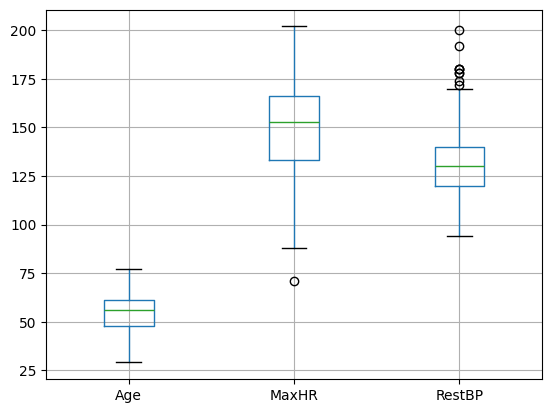

In [11]:
# Box Plot Feature
df.boxplot(column=['Age', 'MaxHR', 'RestBP'])

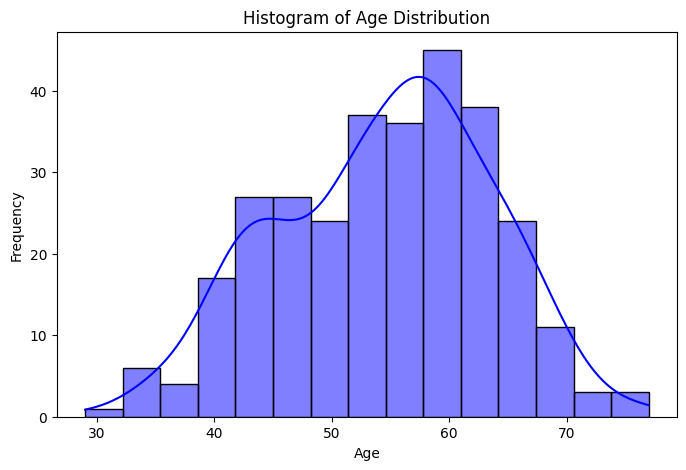

In [12]:
# Histogram for Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution")
plt.show()


Text(0.5, 1.0, 'Histogram of Cholesterol Levels')

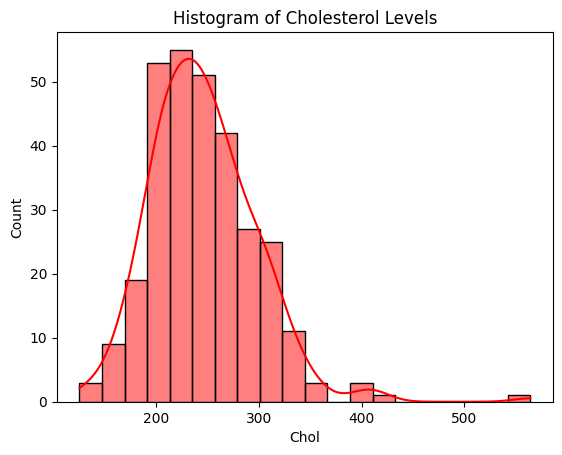

In [13]:
sns.histplot(df['Chol'], bins=20, kde=True, color='red')
plt.title("Histogram of Cholesterol Levels")

In [14]:
# Features & Target
X = df.drop(columns=['AHD'])  # Features
y = df['AHD']  # Target (Heart Disease: Yes/No)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [15]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



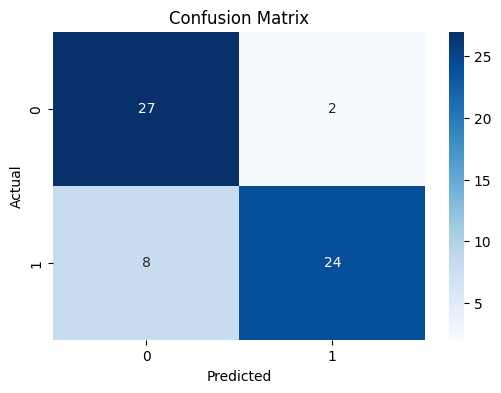

In [16]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()